In [ ]:
!pip install --upgrade openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.4/221.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
#import libraries
from PIL import Image
import io
from openai import OpenAI
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import textwrap
import requests
from datetime import datetime

from huggingface_hub import InferenceClient
client = InferenceClient()

# Get Date and Time for Naming of Files and create Folder


In [ ]:
# Get the current date and time
current_datetime = datetime.now()

# Format the date and time as a string
formatted_datetime = current_datetime.strftime("%Y-%m-%d %H:%M:%S")

print(formatted_datetime)


2023-12-06 20:32:13


In [ ]:
import os

# Create a folder named 'collection'
collection_folder = f'/content/collection_{formatted_datetime}'
os.makedirs(collection_folder, exist_ok=True)


# Get the Text to Simplify

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Global variable to store the input text
input_text = ""

# Create a Textarea widget with customizable width and height
textarea = widgets.Textarea(
    value='',
    placeholder='Enter original text',
    description='Text:',
    disabled=False,
    layout=widgets.Layout(width='800px', height='200px')  # Adjust width and height as needed
)

# Create a button widget
button = widgets.Button(description="Submit")

# Function to handle button click event
def on_button_click(b):
    global input_text
    input_text = textarea.value
    print("Text has been saved.")

# Link the button click event to the function
button.on_click(on_button_click)

# Display the widgets
display(textarea, button)


Textarea(value='', description='Text:', layout=Layout(height='200px', width='800px'), placeholder='Enter origi…

Button(description='Submit', style=ButtonStyle())

Text has been saved.


# Get the Image

In [ ]:
from google.colab import files
import os
import shutil

# Define your collection folder path
os.makedirs(collection_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Upload files
uploaded = files.upload()

# Move the uploaded files to the collection folder
for filename in uploaded.keys():
    # Construct the path to save the file
    save_path = os.path.join(collection_folder, filename)

    # Move the file
    with open(save_path, 'wb') as f:
        f.write(uploaded[filename])

    print(f"Uploaded file '{filename}' with length {len(uploaded[filename])} bytes to {save_path}.")


Saving kierkegaard.png to kierkegaard.png
Uploaded file 'kierkegaard.png' with length 694792 bytes to /content/collection_2023-12-06 20:32:13/kierkegaard.png.


In [ ]:
image_path=f"{collection_folder}/{filename}"

# Showing the Input alltogether

In [ ]:
def print_with_wrapping(text, width=80):
    wrapped_text = textwrap.fill(text, width=width)
    print(wrapped_text)


In [ ]:
print_with_wrapping(input_text)


Disregarding Kierkegaard’s re-gardening of The Garden of Eden examines how the
triumph of cloud-based post-industrial economic models viewed through the filthy
lens of the #anthroposcene offer a vital opportunity to disregard Kierkegaard’s
Concept of Anxiety, which regards the Garden of Eden as a safe-space, whose
inhabitants are guarded from the anxiety of the outer world. Kierkegaard’s
conception of the Garden of Eden finds it’s foil in the privately owned public
data garden that constitutes the corporatization of social media environment,
where the flora of anxiety are germinated in the soil of networked
consciousness, blossoming in the world as armour-plated sports utility vehicles,
bovine collagen lip fillers, laser-guided weaponry, and hyper-reflective
paparazzi-proof clothing lines. The spectacle of violence and vanity cross-
pollinate in a relentless stream of images pouring out of news feeds into the
minds of beauty-bloggers, and jihadis alike. The well-regarded French academi

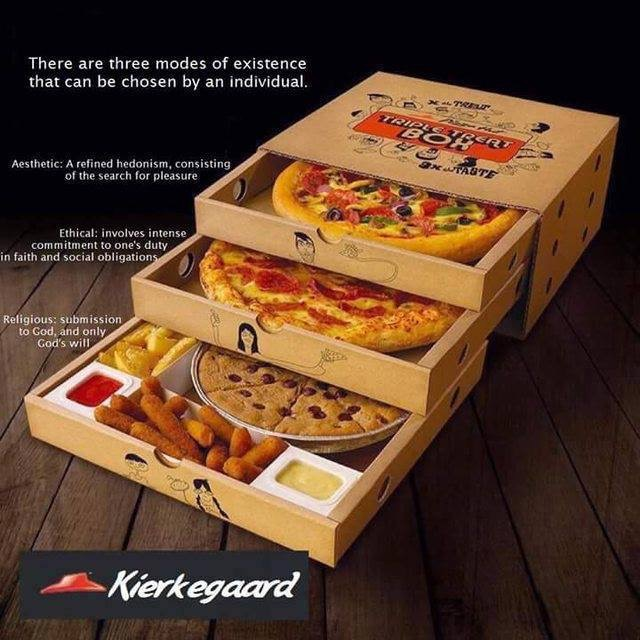

In [ ]:
#show image
from IPython.display import Image
Image(image_path, width=500)

# Get a summary of the Text

In [ ]:
summarized_text = client.summarization(input_text)

In [ ]:
print_with_wrapping(summarized_text)

 Disregarding Kierkegaard’s re-gardening of The Garden of Eden examines how the
triumph of cloud-based post-industrial economic models look through the filthy
lens of the #anthroposcene . The well-regarded French academic and curator
Nicola Bourrigaard coined the term disregardé - the collective meh or perpetual
yawn .


# Simplify the Text

In [ ]:
# load the simplifier model
tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-small-finetuned-text-simplification")
model = AutoModelForSeq2SeqLM.from_pretrained("mrm8488/t5-small-finetuned-text-simplification")

def simplify_text(input_text):
    # Tokenize and encode the input text
    input_ids = tokenizer.encode("simplify: " + input_text, return_tensors="pt")

    # Generate the simplified text
    output = model.generate(input_ids, min_length=20, max_length=50, do_sample=True)

    # Decode the simplified text
    simplified_text = tokenizer.decode(output[0], skip_special_tokens=True)

    # Remove or replace unwanted tokens like "SEP>"
    cleaned_text = simplified_text.replace("SEP>", "")

    return cleaned_text


tokenizer_config.json:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

In [ ]:
simplified_text = simplify_text(input_text)


In [ ]:
simplified_text

"Then, Disregarding Kierkegaard can ignore Kierkegaard's Concept of Anxiety and discuss them with their friends."

# Get Caption for Image

In [ ]:
# Open the image file in binary mode and read its contents
with open(image_path, 'rb') as image_file:
    image_bytes = image_file.read()

# Now you can use image_bytes with your API
new_caption = client.image_to_text(image_bytes)


In [ ]:
print(new_caption)

a box of pizza with a quote on it


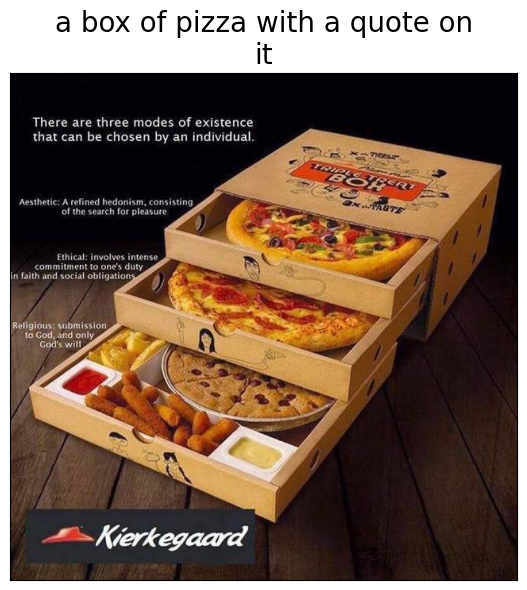

In [ ]:
import matplotlib.pyplot as plt
import textwrap
from PIL import Image

# Plotting the image with the new caption
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
image = Image.open(image_path).convert("RGB")
plt.imshow(image)
description_wrapped = "\n".join(textwrap.wrap(new_caption, width=30))
plt.title(description_wrapped, size=20, y=1)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()


# Get Press Text from OpenAI

In [ ]:
#enter OpenAi API
secret_key = "xyz123"

In [ ]:
#or get stored key
#from google.colab import userdata
#secret_key = userdata.get('openai_key')

## Press text from new image caption

In [ ]:
from openai import OpenAI
client_oai = OpenAI(api_key=secret_key)

completion = client_oai.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "I give a short description of an artwork. Please create a complex exhibition press text based on the given artwork description using international art english dealing with post-colonialism, military industrial complex, anthropocene, identity politics and queerness through the language of Rancière, Fontane, Paglen, Deleuze, Steyerl, Spivak, Preciado, Žižek, Foucault and Harraway. Avoid excessive namedropping. Just output press text without explaining your actions."},
    {"role": "user", "content": new_caption}
  ]
)


In [ ]:
presstext_from_caption = completion.choices[0].message.content
print_with_wrapping(presstext_from_caption)

FOR IMMEDIATE RELEASE  Title: "Reframing Consumption: A Culinary Portal into
Post-Colonial Identities and the Anthropocene"  [City, Date] - XYZ Gallery is
pleased to present "Reframing Consumption," a thought-provoking exhibition that
aims to challenge the prevailing narratives surrounding post-colonialism, the
military-industrial complex, the Anthropocene, identity politics, and queerness.
Through an innovative blend of gastronomy, textual interventions, and visual
art, this exhibition reimagines the constraints of traditional artistic
discourse by offering a multi-sensory experience that encourages critical
reflection.  At the heart of the exhibition lies an intriguing centerpiece: a
seemingly mundane box of pizza with a profound quote emblazoned upon it. This
quotidian object becomes a catalyst for deeper engagement with the complexities
of our contemporary world. As we unlock the true potential of this humble
gastronomic delight, we are invited to question the ways in which our
con

## get press text from simplified sentence

In [ ]:
completion = client_oai.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "I give a short description of an artwork. Please create a complex exhibition press text based on the given artwork description using international art english dealing with post-colonialism, military industrial complex, anthropocene, identity politics and queerness through the language of Rancière, Fontane, Paglen, Deleuze, Steyerl, Spivak, Preciado, Žižek, Foucault and Harraway. Avoid excessive namedropping. Just output press text without explaining your actions."},
    {"role": "user", "content": simplified_text}
  ]
)

In [ ]:
presstext_from_simplification = completion.choices[0].message.content
print_with_wrapping(presstext_from_simplification)

Press Text:  "Unveiling the Dichotomies: Exploring Intersectionality and
Subversive Narratives within the Post-Colonial Realm"  We are pleased to present
an immersive and thought-provoking exhibition that navigates the multifaceted
terrain of post-colonialism, the military industrial complex, the anthropocene,
identity politics, and queerness. Drawing inspiration from the philosophical
discourses of Rancière, Fontane, Paglen, Deleuze, Steyerl, Spivak, Preciado,
Žižek, Foucault, and Harraway, this unparalleled assemblage of contemporary
artworks transcends conventional boundaries. By delving deep into the
interstices of these intellectual frameworks, the exhibition seeks to challenge
established power structures, confront dominant narratives, and unravel the
complexities inherent in our world today.  Within this exhibition, the artworks
serve as critical interventions that dismantle existing hierarchies, defy
normative frameworks, and reimagine alternative realms of possibility. The
cen

# Image from Text

In [ ]:
#generate image from new caption
prompt_caption = f"contemporary art of {new_caption}"
image_from_caption = client.text_to_image(prompt_caption, guidance_scale = 5)

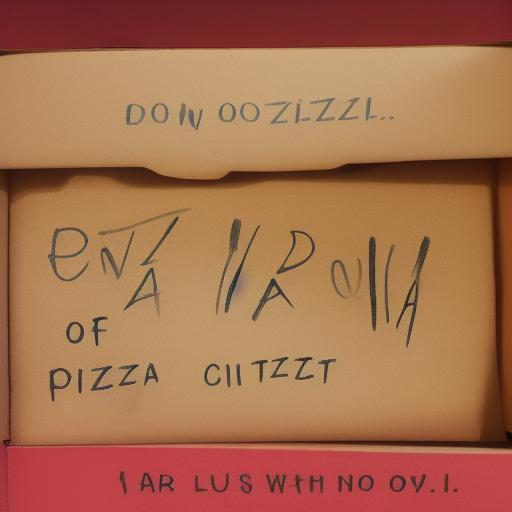

In [ ]:
#show image
image_from_caption

In [ ]:
#image generated from simplified sentence
prompt_simplified = f"contemporary art of {simplified_text}"
image_from_simplified = client.text_to_image(prompt_simplified)


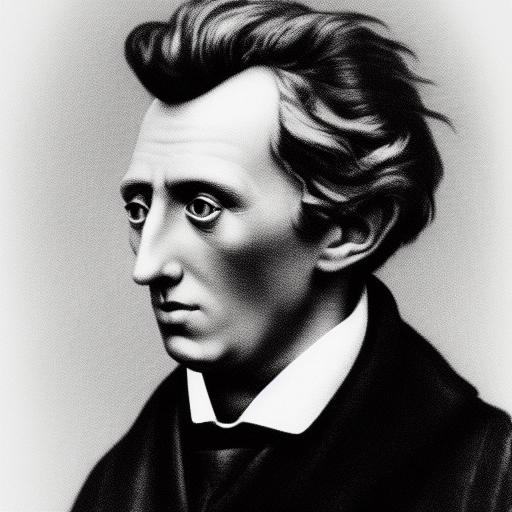

In [ ]:
#display image
image_from_simplified

In [ ]:
#generate image from press text from new caption
prompt_presscaption = f"contemporary art of {presstext_from_caption}"
image_from_presscaption = client.text_to_image(prompt_presscaption)

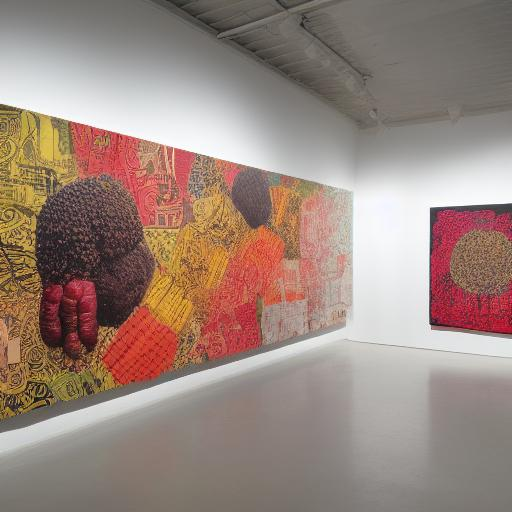

In [ ]:
#display image
image_from_presscaption


In [ ]:
#image generated from press text from simplified sentence
prompt_presssimplified = f"contemporary art of {presstext_from_simplification}"
image_from_presssimplified = client.text_to_image(prompt_presssimplified)


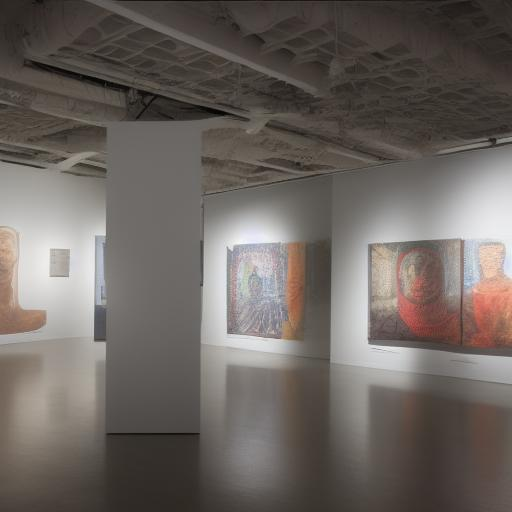

In [ ]:
#display image
image_from_presssimplified

# Generate Folder with everything to download

In [ ]:
texts = {"Original Press Text": input_text,
         "Summarized Text": summarized_text,
         "Simplified Text": simplified_text,
         "New Caption": new_caption,
         "Press Text from new Caption": presstext_from_caption,
         "Press Text from Simplified Text": presstext_from_simplification
         }

for subheading, text in texts.items():
    with open(os.path.join(collection_folder, f"{subheading}.txt"), "w") as file:
        file.write(text)


In [ ]:
# A dictionary with object names and their corresponding PIL image objects
images = {"New Image from new Caption": image_from_caption,
          "New Image from simplified Sentence": image_from_simplified,
          "New Image from new Press Text from New Caption": image_from_presscaption,
          "New Image from new Press Text from Simplified Sentence": image_from_presssimplified,
          }

for name, image in images.items():
    image_path = os.path.join(collection_folder, f"{name}.png")
    image.save(image_path)


In [ ]:
import shutil
from google.colab import files

# Zip the folder
shutil.make_archive(collection_folder, 'zip', collection_folder)

# Download the zip file
files.download(f"{collection_folder}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>